In [1]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize the Pose Detection Model

In [2]:
# Initialize mediapipe pose class
mp_pose = mp.solutions.pose

# Setting up the pose function
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation
mp_drawing = mp.solutions.drawing_utils

# Read an Image

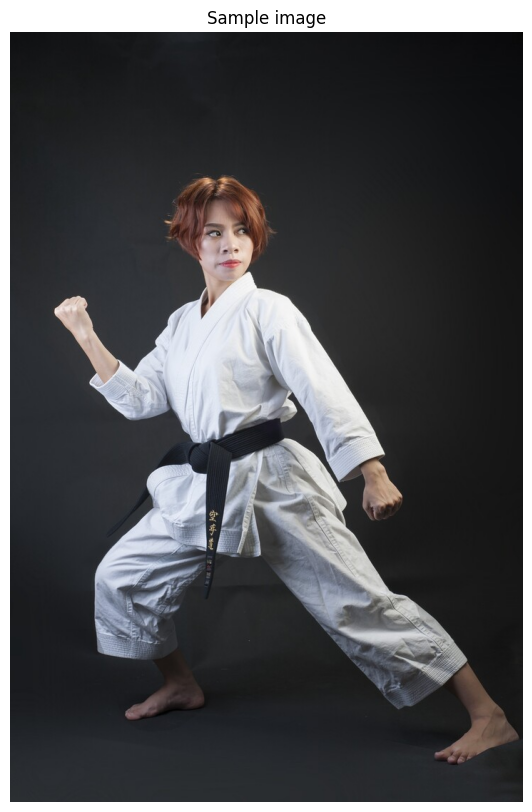

In [3]:
# Read an image from the  specified path
sample_img = cv2.imread('./sample.jpg')

# Specify a size of  the figure
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display
plt.title("Sample image")
plt.axis('off')
plt.imshow(sample_img[:,:,::-1])
plt.show()

# Perform Pose Detection

In [5]:
# Perform pose detection after converting  the image into RGB format
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks
    for i in range(2):
        
        #Display the found normalized landmarks:
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.42638272047042847
y: 0.28251832723617554
z: -0.567802369594574
visibility: 1.0

LEFT_EYE_INNER:
x: 0.43525373935699463
y: 0.2628730535507202
z: -0.5315181612968445
visibility: 0.9999998807907104



In [5]:
# Retrieve the height and width of the sample image
image_height, image_width, _ = sample_img.shape

# Check if any landmarks are found:
if results.pose_landmarks:
    
    # Iterate two times as we only want to  display first two landmark
    for i in range(2):
        
        # Display  the found landmarks after converting then into their original scate
        print(f'{mp_pose.PoseLandmark(i).name}:')
        print(f'x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
x: 306.56917601823807
y: 305.1197934150696
z: -408.2499037384987
visibility: 1.0

LEFT_EYE_INNER:
x: 312.94743859767914
y: 283.90289783477783
z: -382.1615579724312
visibility: 0.9999998807907104



# Draw the detected land marks on the Sample image

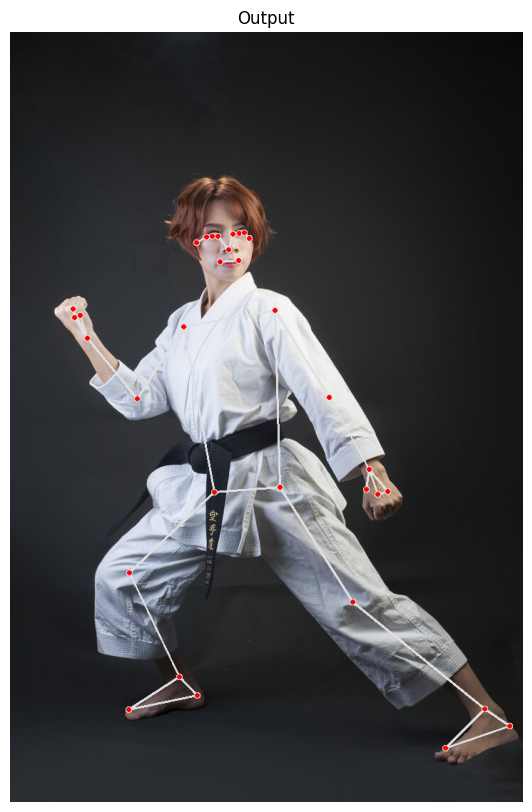

In [6]:
# Create a copy of the sample image to draw landmark on
img_copy = sample_img.copy()

# Check any landmarks are found
if results.pose_landmarks:
    
    # Draw pose landmarks on the sample image
    mp_drawing.draw_landmarks(image = img_copy, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
    
    # Specify a size of the figure
    fig = plt.figure(figsize = [10, 10])
    
    #Display the output image with the landmarks drawn, also convert BGR to RGB for display
    plt.title("Output")
    plt.axis('off')
    plt.imshow(img_copy[:,:,::-1])
    plt.show()

# Show landmarks in 3D

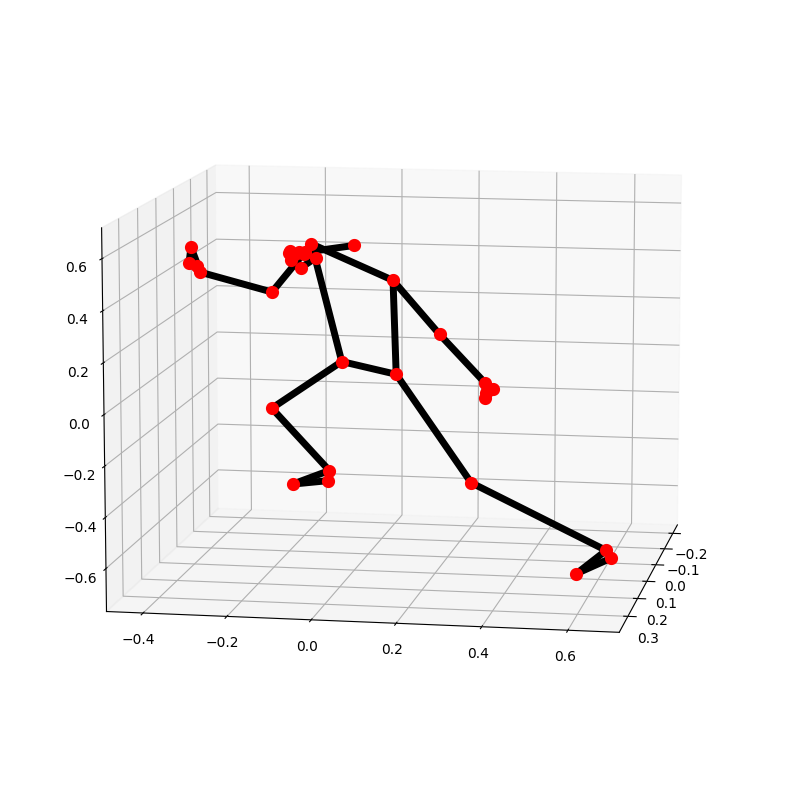

In [7]:
# Plot Pose landmarks in 3D
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

# Create a Pose Detection Function

In [8]:
def detectPose(image, pose, display = True):
    """
    This function performs pose detection on an image
    Args:
        image: The in put image with a person whose pose landmarks need to bbe detected
        pose: The pose setup function required  to perform the pose detection
        display: A boolean value that is if set to true the function displays the original input image. 
    
    Return:
        ouutput_image : input image with detected pose
        landmarks: A list of detected landmarks converted into scale
    """
    
    # Create a copy of the input image 
    output_image = image.copy()
    
    # Convert the image from BGR to RGB
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the pose detection
    results = pose.process(imageRGB)
    
    height, width, _ = image.shape
    
    # Innitialize a  list to store  the  detected landmarks
    landmarks = []
    
    # Check if any landmarks were detected
    if results.pose_landmarks:
        
        # Draw  pose lanndmarks  on the putput image
        mp_drawing.draw_landmarks(image = output_image, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list
            landmarks.append((int(landmark.x * width), int(landmark.y * height), (landmark.z * width)))
            
    # Check if the original input image and  the resultant image are specified to be displayed
    if display:
        
        # Display the original input image and the resultant image
        plt.figure(figsize = [22,22])
        plt.subplot(121)
        plt.imshow(image[:,:,::-1])
        plt.title("Original image")
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output image")
        plt.axis('off')
        
        # Also plot the pose lanndmarks in 3D
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    else:
        
        # Return the output image and the found landmark
        return output_image, landmarks

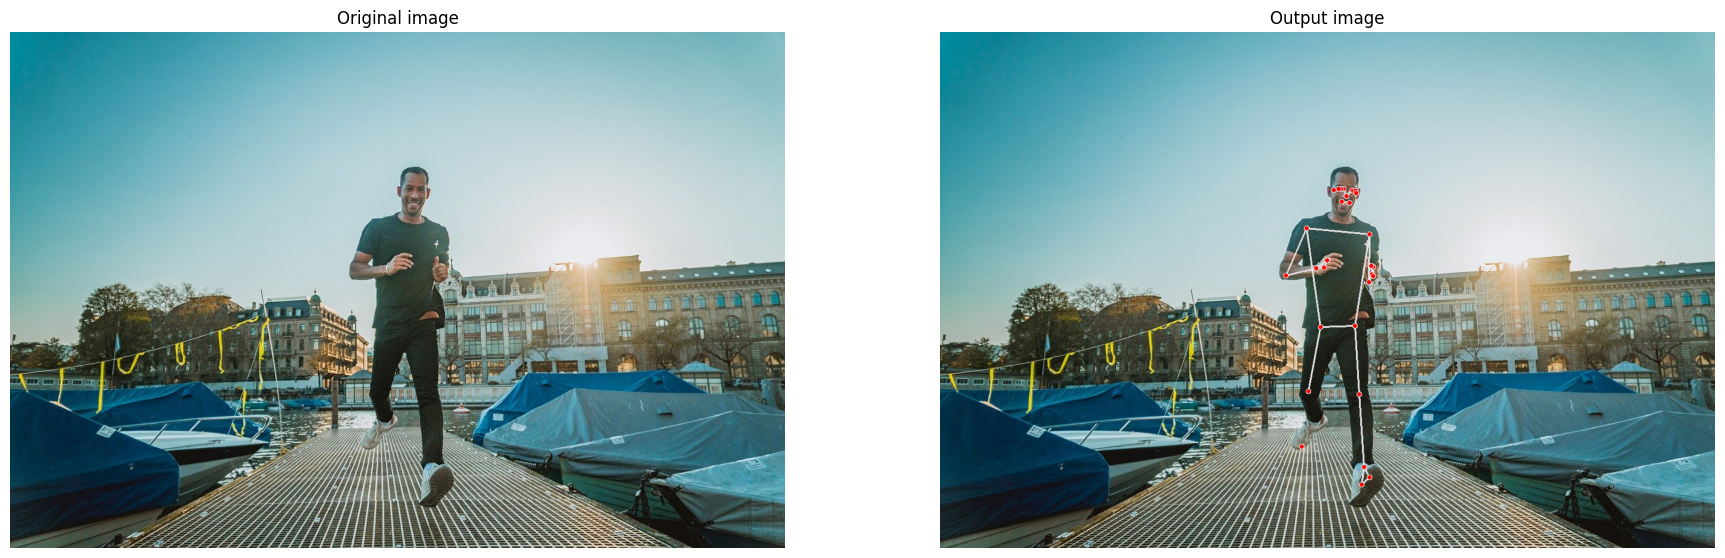

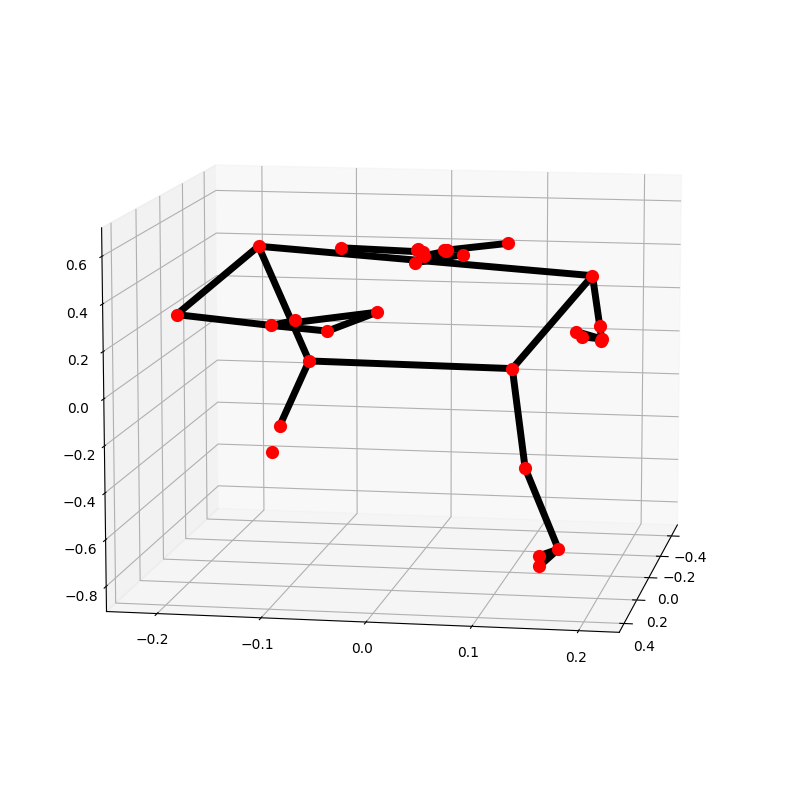

In [9]:
# Read another sample image and perform the pose detection 
image = cv2.imread('./sample1.jpg')
detectPose(image, pose, display = True)

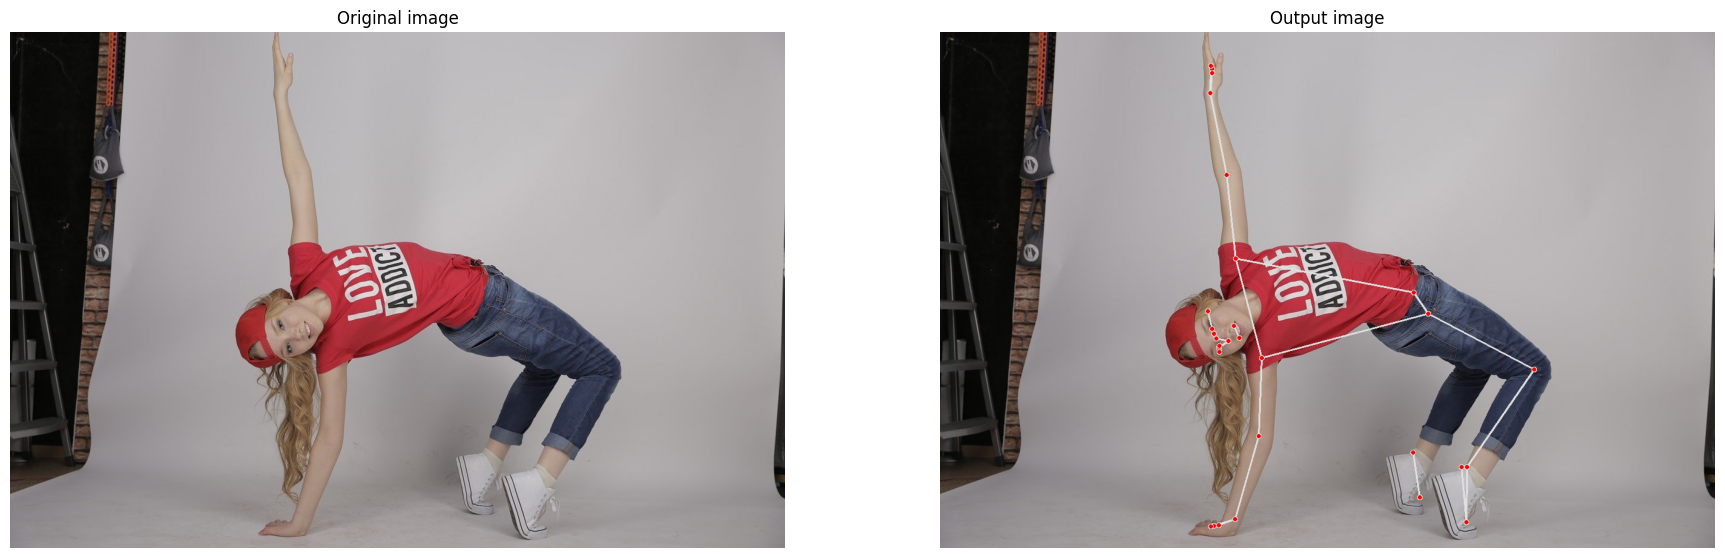

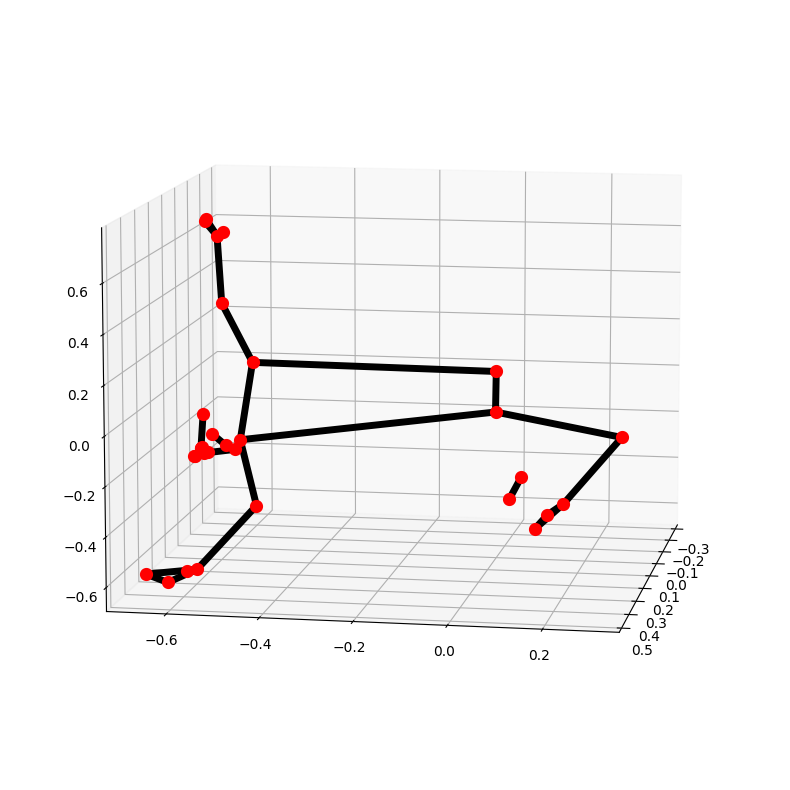

In [10]:
# Read another sample image and perform the pose detection 
image = cv2.imread('./sample2.jpg')
detectPose(image, pose, display = True)

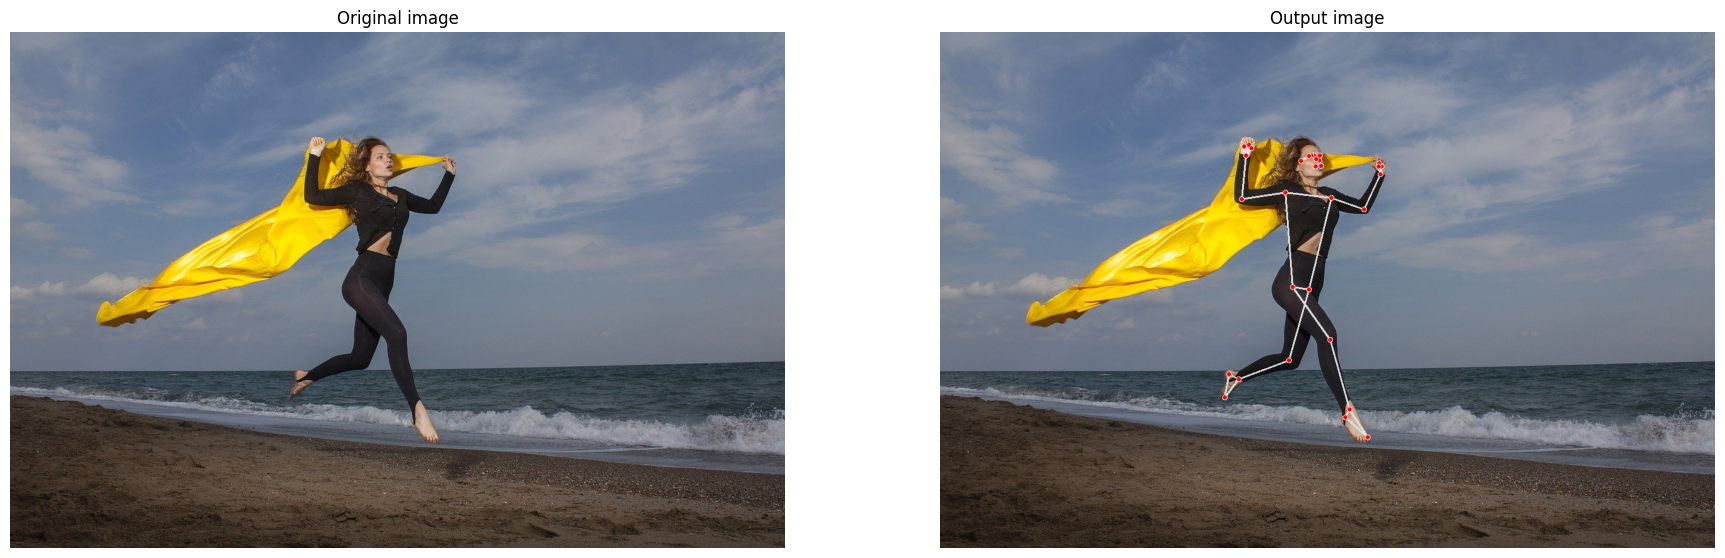

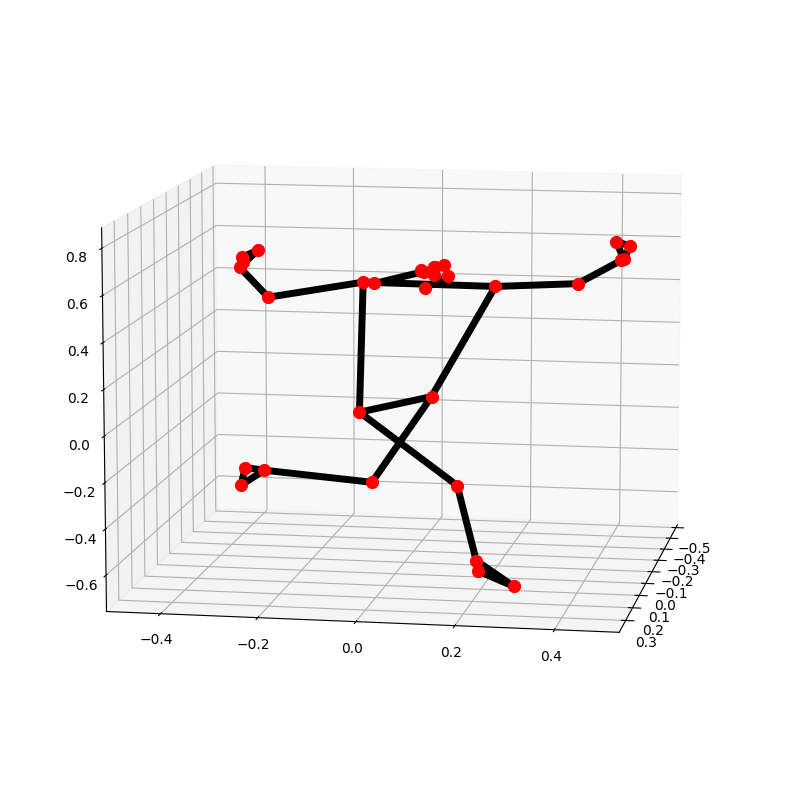

In [11]:
# Read another sample image and perform the pose detection 
image = cv2.imread('./sample3.jpg')
detectPose(image, pose, display = True)

#  Pose Detection on Real Time webcam Feed/Video

In [12]:
# Setup Pose function for video
pose_video = mp_pose.Pose(static_image_mode = False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the video capture object to read from the webcam
video = cv2.VideoCapture(0)

# Create named window for resizing
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)

# Initilize  the video  capture   object to read from a file
# video = cv2.VideoCapture('./running.mp4')

# Set video camera size 
video.set(3, 1280)
video.set(4, 960)

# Initilize a variable to store the time of the previous frame
time1 = 0

# Iterate until the video is accessed  successfully
while video.isOpened():
    
    # Read a frame
    ok, frame = video.read()
    
    # Check if frame is not read properly
    if not ok:
        
        break
        
    # flip the frame horizontally for natural visulization
    frame = cv2.flip(frame,1)
    
    # Get the width and height  of the frame
    frame_height, frame_width, _ = frame.shape
    
    # Resize the frame while keeping the aspect ratio
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # Perform Pse landmark detection
    frame, _ =  detectPose(frame, pose_video, display=False)
    
    #  Set the time for this frame to the current time
    time2 = time()
    
    # Check if the difference  between the previous and this frame time > 0 to avoid division by zero
    if (time2 - time1) > 0:
        
        # Calculate the number  of frames per scond
        frames_per_second = 1.0 / (time2 - time1)
        
        # Write the calculated number of frames per scond onthe screen
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10,30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0),3)
        
    # Update the previous frame time to the frame time
    # As time frame will become previous frame in next iteration
    time1 = time2
    
    # Display the frame
    cv2.imshow('Pose detection', frame)
    
    # Wait until a key is pressed 
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed
    if(k==27):
        
        break
        
# Release the video capture object
video.release()

# close the  window
cv2.destroyAllWindows()

# Pose Classification with Angle 

In [13]:
def calculateAngle(landmark1, landmark2, landmark3):
    
    '''
    calculate angle between three points
    args:
        
    Returns:
        angle
    '''
    
    # Get the required landmarks coordinate
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
    
    # Claculate the angle between 3 points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than 0
    if angle < 0:
        
        angle += 360
        
    return angle

In [14]:
# Calculte the angle 
angle = calculateAngle((558,326,0),(642,333,0),(718,321,0))

print(f'The calsulated angle is {angle}')

The calsulated angle is 166.26373169437744


# Create a Function to Perform Pose Classification

In [15]:
def classifyPose(landmarks, ouput_image, display=False):
    '''
    Yoga pose classification suing angle of body jopints
    Args:
        landmarks: list of detected pose landmarks
        output_image: image with detected pose
        display: boolean 
    Returns:
        output_image: with detected pose landmarks
        label: classified pose
    '''
    
    # Initialize the label of the pose
    label = 'Unknown Pose'
    
    # Specify the color of label
    color = (0,0,255)
    
    # calculate the required angles
    # =============================================================================================
    
    # Get angle: left shoulder, elbow, wrist
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get angle: right shoulder, elbow, wrist
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])
    
    # Get angle: left elbow, wrist, hip
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
    
    # Get angle: right hip, shoulder, elbow
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
    
    # Get the angle: left hip, knee, ankle
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
    
    # Get the angle: right hip, knee, ankle
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    #===================================================================================================================
    # Check warrior 2 pose or T pose
    # arms be straight and shoulder should be at the specific angle
    #==================================================================================================================
    
    # Check if the both arms straight 
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
        
        # Check if shoulders are at the required angle
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110 :
        
    # Check if it is the warrior 2 pose
    #=========================================================================================================================
    
            # Check if one leg is straight
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle >165 and right_knee_angle < 195 :
            
                # Check if the other leg is bended at the required angle
                if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120 :
                
                    # Specify the label warrior 2
                    label = 'Warrior 2 pose'
                    
    #============================================================================================================================
    # Check if T pose
    #===========================================================================================================================
            # Check if both legs are straight
            if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195 :
                
                #Specify the label 
                label = 'T pose'
                
    #===============================================================================================================================
    # Check Tree pose
    #===============================================================================================================================
    
    #Check if one leg is straigh
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195 :
        
        # Check the other leg at the required angle
        if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45 :
            
            label = 'Tree pose'
            
    #===========================================================================================================================
    
    # Check if the pose label success
    if label != 'Unknown Pose':
        
        # Update the color to green
        color = (0, 255, 0)
        
    # wirte the label on the output image 
    cv2.putText(output_image, label, (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, color, 2)
    
    # Check if the resultant image is specified to display
    if display:
        
        plt.figure(figsize=[10,10])
        plt.imshow(output_image[:,:,::-1])
        plt.title("Output Image")
        plt.axis('off')
    
    else:
        
        # Return the output image and the pose label
        return output_image, label
    
    
    
    

# Warrior 2 pose

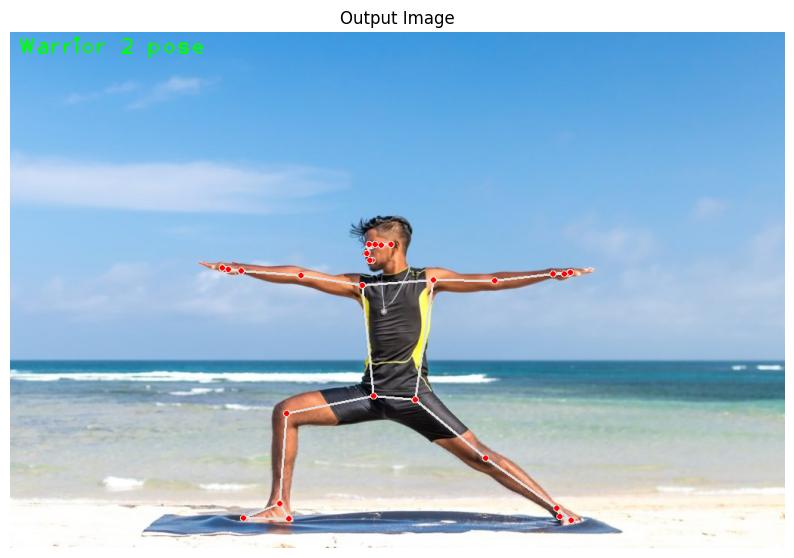

In [16]:
# Read a image and do the pose classification
image = cv2.imread('./warriorIIpose.jpg')
output_image,landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

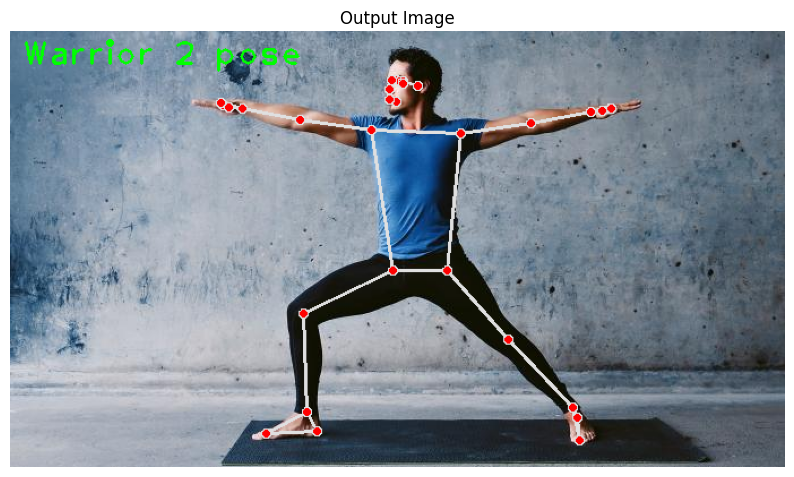

In [17]:
# Read a image and do the pose classification
image = cv2.imread('./warriorIIpose1.jpg')
output_image,landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# Tree pose

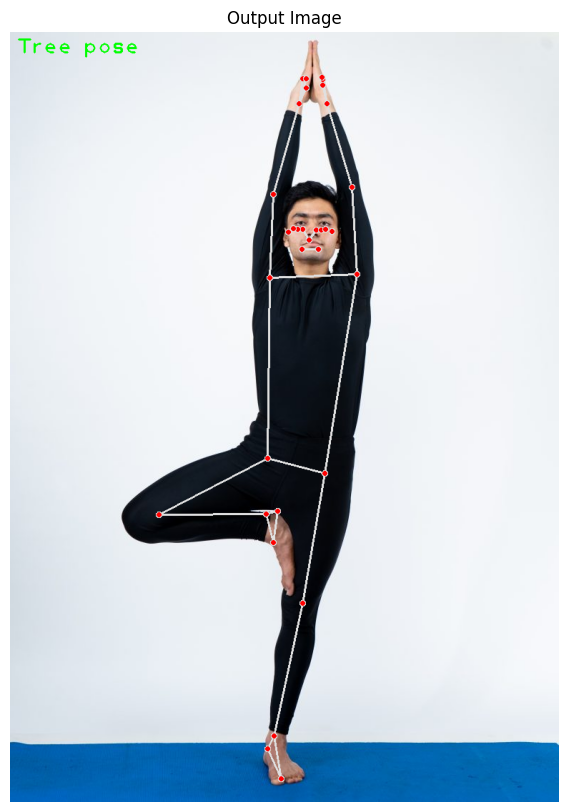

In [18]:
# Read a image and do the pose classification
image = cv2.imread('./treepose.jpg')
output_image,landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, 
                                                       min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

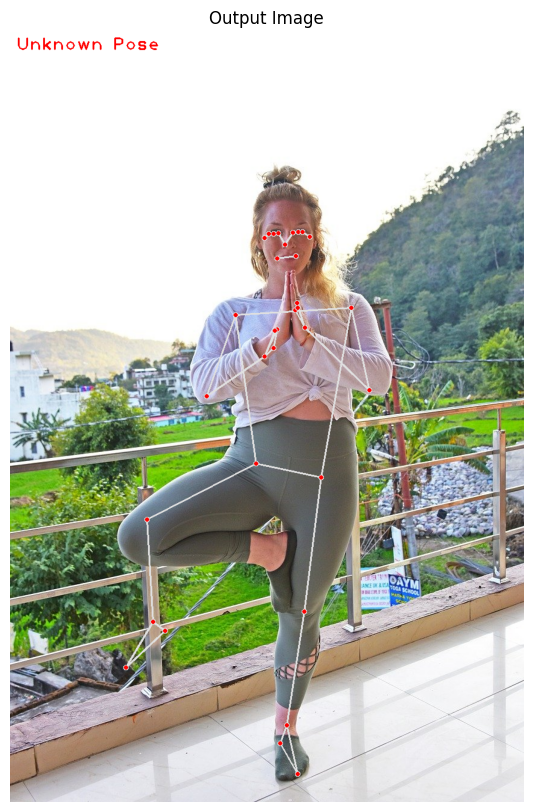

In [19]:
# Read a image and do the pose classification
image = cv2.imread('./treepose1.jpg')
output_image,landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, 
                                                       min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

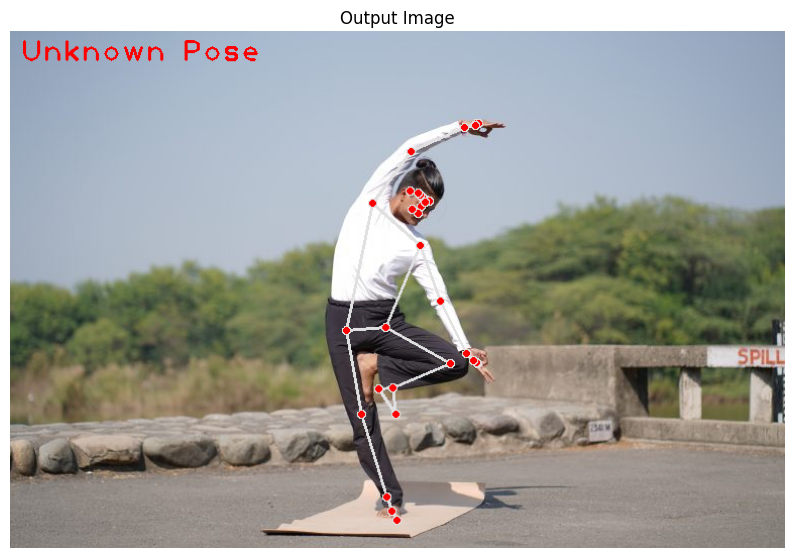

In [20]:
# Read a image and do the pose classification
image = cv2.imread('./treepose2.jpg')
output_image,landmarks = detectPose(image, mp_pose.Pose(static_image_mode=True, 
                                                       min_detection_confidence=0.5, model_complexity=0), display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

# T pose

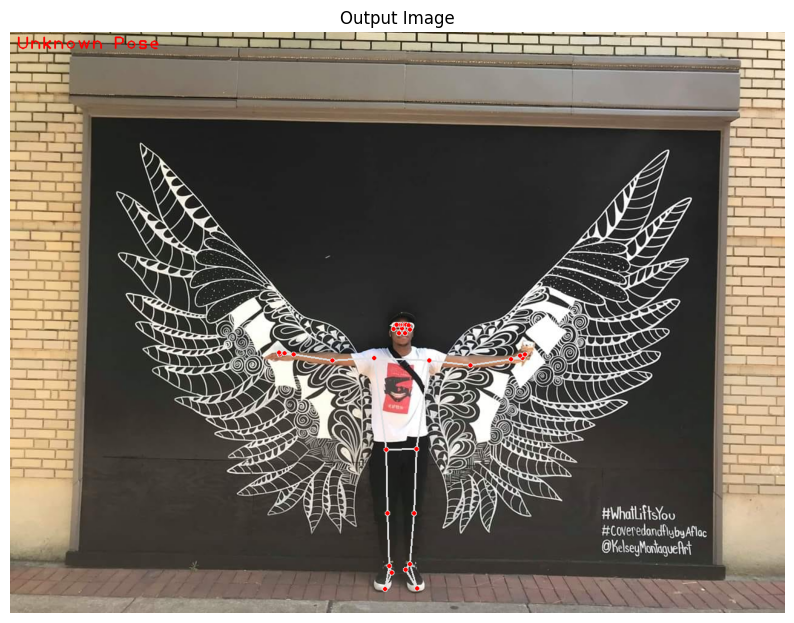

In [21]:
# Read a image and do the pose classification
image = cv2.imread('./Tpose.jpg')
output_image,landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

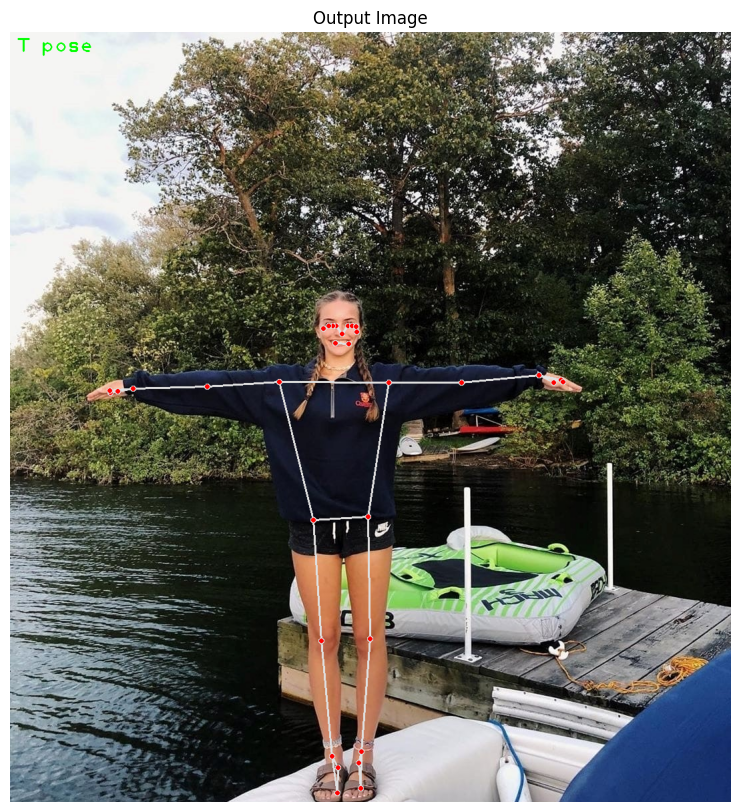

In [22]:
# Read a image and do the pose classification
image = cv2.imread('./Tpose1.jpg')
output_image,landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)

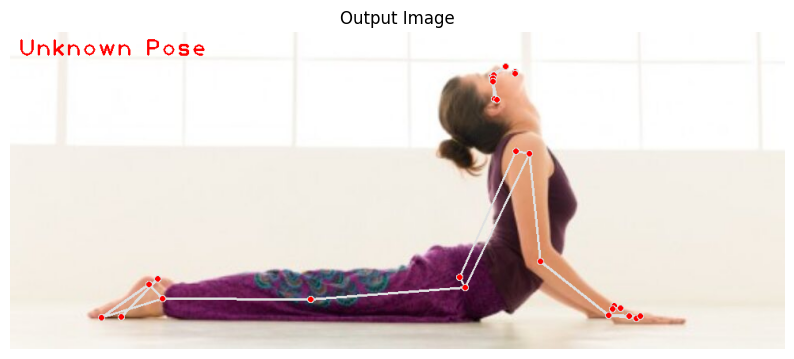

In [23]:
# Read a image and do the pose classification
image = cv2.imread('./cobrapose1.jpg')
output_image,landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPose(landmarks, output_image, display=True)
    
        
# cv2.destroyAllWindows()

# Pose Classification on Realtime Webcam 

In [24]:
# Setup Pose function for video
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the video capture object
camera_video = cv2.VideoCapture(0)

# camera_video = cv2.VideoCapture('./running.mp4')

# Initialize a resizable window
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

camera_video.set(3,1280)
camera_video.set(4,960)



# Iterate untill the webcam success
while camera_video.isOpened():
    
    ok, frame = camera_video.read()
    
    # check if frame is not ok
    if not ok:
        
        continue
#         break
        
    # Flip the frame horizontally
    frame = cv2.flip(frame,1)
    
    frame_height, frame_width, _ = frame.shape
    
    # resize and keep ratio
    frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
    # pose landmark detection
    frame, landmarks = detectPose(frame, pose_video, display=False)
    
    if landmarks:
        
        # pose classification
        frame, _ = classifyPose(landmarks, frame, display=False)
        
    cv2.imshow('Pose Classification', frame)
    
    # wait untill a key is pressed
    # retrived the ASC|| code the key
    k = cv2.waitKey(1) & 0xFF
    
    #  check ESC
    if(k==27):
        
        # Break the loop
        break

# Release the video capture object  
camera_video.release()
cv2.destroyAllWindows()
    